In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [49]:
# Load the hotel reviews from CSV

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df=pd.read_csv(r"C:\Users\KIIT\Downloads\Hotel_Reviews.csv")
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")

Loading data file now, this could take a while depending on file size
Loading took 4.39 seconds


In [50]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


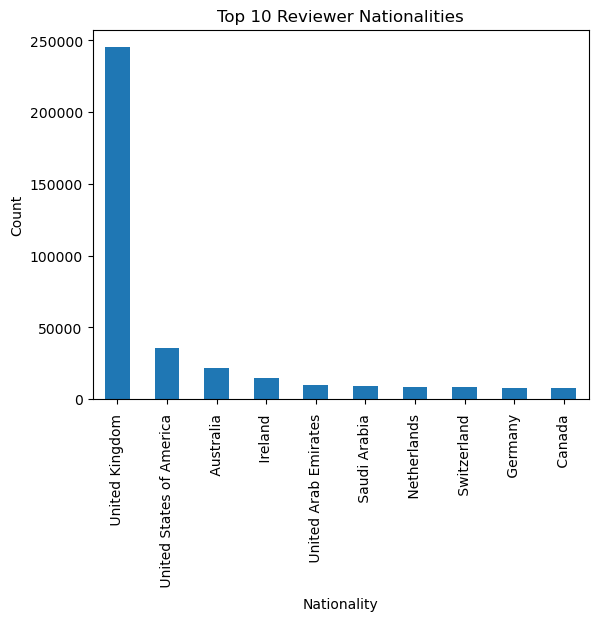

In [51]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
top_10_nationalities = df['Reviewer_Nationality'].value_counts().nlargest(10)

# Plotting the histogram for the top 10 nationalities
top_10_nationalities.plot(kind='bar')
plt.title('Top 10 Reviewer Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

In [52]:
# What was the most frequently reviewed hotel for the top 10 nationalities
for nat in top_10_nationalities[:10].index:
   # First, extract all the rows that match the criteria into a new dataframe
   nat_df = df[df["Reviewer_Nationality"] == nat]   
   # Now get the hotel freq
   freq = nat_df["Hotel_Name"].value_counts()
   print("The most reviewed hotel for " + str(nat).strip() + " was " + str(freq.index[0]) + " with " + str(freq[0]) + " reviews.") 
   

The most reviewed hotel for United Kingdom was Britannia International Hotel Canary Wharf with 3833 reviews.
The most reviewed hotel for United States of America was Hotel Esther a with 423 reviews.
The most reviewed hotel for Australia was Park Plaza Westminster Bridge London with 167 reviews.
The most reviewed hotel for Ireland was Copthorne Tara Hotel London Kensington with 239 reviews.
The most reviewed hotel for United Arab Emirates was Millennium Hotel London Knightsbridge with 129 reviews.
The most reviewed hotel for Saudi Arabia was The Cumberland A Guoman Hotel with 142 reviews.
The most reviewed hotel for Netherlands was Jaz Amsterdam with 97 reviews.
The most reviewed hotel for Switzerland was Hotel Da Vinci with 97 reviews.
The most reviewed hotel for Germany was Hotel Da Vinci with 86 reviews.
The most reviewed hotel for Canada was St James Court A Taj Hotel London with 61 reviews.


In [53]:
#Number of Reviews per Hotel
hotel_freq_df = df.drop(["Hotel_Address", "Additional_Number_of_Scoring", "Review_Date", "Average_Score", "Reviewer_Nationality", "Negative_Review", "Review_Total_Negative_Word_Counts", "Positive_Review", "Review_Total_Positive_Word_Counts", "Total_Number_of_Reviews_Reviewer_Has_Given", "Reviewer_Score", "Tags", "days_since_review", "lat", "lng"], axis = 1)

# Group the rows by Hotel_Name, count them and put the result in a new column Total_Reviews_Found
hotel_freq_df['Total_Reviews_Found'] = hotel_freq_df.groupby('Hotel_Name').transform('count')

# Get rid of all the duplicated rows
hotel_freq_df = hotel_freq_df.drop_duplicates(subset = ["Hotel_Name"])
display(hotel_freq_df) 

,Hotel_Name,Total_Number_of_Reviews,Total_Reviews_Found
0,Hotel Arena,1403,405
405,K K Hotel George,1831,566
971,Apex Temple Court Hotel,2619,1037
2008,The Park Grand London Paddington,4380,1770
3778,Monhotel Lounge SPA,171,35
...,...,...,...
511962,Suite Hotel 900 m zur Oper,3461,439
512401,Hotel Amadeus,717,144
512545,The Berkeley,232,100
512645,Holiday Inn London Kensington,5945,2768


In [54]:
# define a function that takes a row and performs some calculation with it
def get_difference_review_avg(row):
  return row["Average_Score"] - row["Calc_Average_Score"]

# 'mean' is mathematical word for 'average'
df['Calc_Average_Score'] = round(df.groupby('Hotel_Name').Reviewer_Score.transform('mean'), 1)

# Add a new column with the difference between the two average scores
df["Average_Score_Difference"] = df.apply(get_difference_review_avg, axis = 1)

# Create a df without all the duplicates of Hotel_Name (so only 1 row per hotel)
review_scores_df = df.drop_duplicates(subset = ["Hotel_Name"])

# Sort the dataframe to find the lowest and highest average score difference
review_scores_df = review_scores_df.sort_values(by=["Average_Score_Difference"])

display(review_scores_df[["Average_Score_Difference", "Average_Score", "Calc_Average_Score", "Hotel_Name"]])

,Average_Score_Difference,Average_Score,Calc_Average_Score,Hotel_Name
495945,-0.8,7.7,8.5,Best Western Hotel Astoria
111027,-0.7,8.8,9.5,Hotel Stendhal Place Vend me Paris MGallery by...
43688,-0.7,7.5,8.2,Mercure Paris Porte d Orleans
178253,-0.7,7.9,8.6,Renaissance Paris Vendome Hotel
218258,-0.5,7.0,7.5,Hotel Royal Elys es
...,...,...,...,...
151416,0.7,7.8,7.1,Best Western Allegro Nation
22189,0.8,7.1,6.3,Holiday Inn Paris Montparnasse Pasteur
250308,0.9,8.6,7.7,MARQUIS Faubourg St Honor Relais Ch teaux
68936,0.9,6.8,5.9,Villa Eugenie


In [55]:
#Calculate and print out how many rows have column Negative_Review values of "No Negative"
#Calculate and print out how many rows have column Positive_Review values of "No Positive"
#Calculate and print out how many rows have column Positive_Review values of "No Positive" and Negative_Review values of "No Negative"
# with lambdas:
start = time.time()
no_negative_reviews = df.apply(lambda x: True if x['Negative_Review'] == "No Negative" else False , axis=1)
print("Number of No Negative reviews: " + str(len(no_negative_reviews[no_negative_reviews == True].index)))

no_positive_reviews = df.apply(lambda x: True if x['Positive_Review'] == "No Positive" else False , axis=1)
print("Number of No Positive reviews: " + str(len(no_positive_reviews[no_positive_reviews == True].index)))

both_no_reviews = df.apply(lambda x: True if x['Negative_Review'] == "No Negative" and x['Positive_Review'] == "No Positive" else False , axis=1)
print("Number of both No Negative and No Positive reviews: " + str(len(both_no_reviews[both_no_reviews == True].index)))
end = time.time()
print("Lambdas took " + str(round(end - start, 2)) + " seconds")

Number of No Negative reviews: 127890
Number of No Positive reviews: 35946
Number of both No Negative and No Positive reviews: 127
Lambdas took 14.03 seconds


In [56]:
def replace_address(row):
    if "Netherlands" in row["Hotel_Address"]:
        return "Amsterdam, Netherlands"
    elif "Barcelona" in row["Hotel_Address"]:
        return "Barcelona, Spain"
    elif "United Kingdom" in row["Hotel_Address"]:
        return "London, United Kingdom"
    elif "Milan" in row["Hotel_Address"]:        
        return "Milan, Italy"
    elif "France" in row["Hotel_Address"]:
        return "Paris, France"
    elif "Vienna" in row["Hotel_Address"]:
        return "Vienna, Austria" 

# Replacing all the addresses with a shortened, more useful form
df["Hotel_Address"] = df.apply(replace_address, axis = 1)
# The sum of the value_counts() should add up to the total number of reviews
print(df["Hotel_Address"].value_counts())

London, United Kingdom    262301
Barcelona, Spain           60149
Paris, France              59928
Amsterdam, Netherlands     57214
Vienna, Austria            38939
Milan, Italy               37207
Name: Hotel_Address, dtype: int64


In [57]:
display(df.groupby("Hotel_Address").agg({"Hotel_Name": "nunique"}))

,Hotel_Name
Hotel_Address,
"Amsterdam, Netherlands",105
"Barcelona, Spain",211
"London, United Kingdom",400
"Milan, Italy",162
"Paris, France",458
"Vienna, Austria",158


In [58]:
import pandas as pd

# Assuming df is your original DataFrame

# Drop unnecessary columns
df.drop(["Additional_Number_of_Scoring"], axis=1, inplace=True)

# Replacing `Total_Number_of_Reviews` and `Average_Score` with our own calculated values
df['Total_Number_of_Reviews'] = df.groupby('Hotel_Name')['Hotel_Name'].transform('size')
df['Average_Score'] = round(df.groupby('Hotel_Name')['Reviewer_Score'].transform('mean'), 1)

# Drop duplicate rows to keep unique hotel information
df.drop_duplicates(subset='Hotel_Name', inplace=True)

# Reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(df)


               Hotel_Address Review_Date  Average_Score  \
0     Amsterdam, Netherlands    8/3/2017            7.8   
1     London, United Kingdom    8/3/2017            8.6   
2     London, United Kingdom    8/2/2017            9.3   
3     London, United Kingdom    8/2/2017            7.7   
4              Paris, France   6/29/2017            8.8   
...                      ...         ...            ...   
1487         Vienna, Austria    8/2/2017            8.0   
1488         Vienna, Austria   6/26/2017            8.9   
1489  London, United Kingdom    7/8/2017            9.1   
1490  London, United Kingdom    8/3/2017            7.7   
1491         Vienna, Austria    8/2/2017            7.8   

                            Hotel_Name Reviewer_Nationality  \
0                          Hotel Arena              Russia    
1                     K K Hotel George             Ireland    
2              Apex Temple Court Hotel      United Kingdom    
3     The Park Grand London Paddington 

In [59]:
# Remove opening and closing brackets
df.Tags = df.Tags.str.strip("[']")
# remove all quotes too
df.Tags = df.Tags.str.replace(" ', '", ",", regex = False)

In [60]:
# Process the Tags into new columns
# The file Hotel_Reviews_Tags.py, identifies the most important tags
# Leisure trip, Couple, Solo traveler, Business trip, Group combined with Travelers with friends, 
# Family with young children, Family with older children, With a pet
df["Leisure_trip"] = df.Tags.apply(lambda tag: 1 if "Leisure trip" in tag else 0)
df["Couple"] = df.Tags.apply(lambda tag: 1 if "Couple" in tag else 0)
df["Solo_traveler"] = df.Tags.apply(lambda tag: 1 if "Solo traveler" in tag else 0)
df["Business_trip"] = df.Tags.apply(lambda tag: 1 if "Business trip" in tag else 0)
df["Group"] = df.Tags.apply(lambda tag: 1 if "Group" in tag or "Travelers with friends" in tag else 0)
df["Family_with_young_children"] = df.Tags.apply(lambda tag: 1 if "Family with young children" in tag else 0)
df["Family_with_older_children"] = df.Tags.apply(lambda tag: 1 if "Family with older children" in tag else 0)
df["With_a_pet"] = df.Tags.apply(lambda tag: 1 if "With a pet" in tag else 0)

In [61]:
df.drop(["Review_Total_Negative_Word_Counts", "Review_Total_Positive_Word_Counts", "days_since_review", "Total_Number_of_Reviews_Reviewer_Has_Given"], axis = 1, inplace=True)

# Saving new data file with calculated columns
print("Saving results to Hotel_Reviews_Filtered.csv")
df.to_csv(r'C:/Users/KIIT/Downloads/Hotel_Reviews_Filtered.csv', index = False)

Saving results to Hotel_Reviews_Filtered.csv


In [62]:
import time
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...


True

In [63]:
df=pd.read_csv(r"C:\Users\KIIT\Downloads\Hotel_Reviews_Filtered.csv")

In [64]:
df.head()

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Total_Number_of_Reviews,Positive_Review,Reviewer_Score,Tags,...,Calc_Average_Score,Average_Score_Difference,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet
0,"Amsterdam, Netherlands",8/3/2017,7.8,Hotel Arena,Russia,I am so angry that i made this post available...,405,Only the park outside of the hotel was beauti...,2.9,"Leisure trip, Couple, Duplex Double Room, Sta...",...,7.8,-0.1,1,1,0,0,0,0,0,0
1,"London, United Kingdom",8/3/2017,8.6,K K Hotel George,Ireland,Really nothing negative to say about this hotel,566,Very comfortable beds smart bathroom good sho...,9.6,"Leisure trip, Group, Classic Twin Room, Staye...",...,8.6,-0.1,1,0,0,0,1,0,0,0
2,"London, United Kingdom",8/2/2017,9.3,Apex Temple Court Hotel,United Kingdom,Difficult to locate the phone to contact rece...,1037,They have followed through special requests C...,9.2,"Leisure trip, Couple, Deluxe King Room with C...",...,9.3,-0.1,1,1,0,0,0,0,0,0
3,"London, United Kingdom",8/2/2017,7.7,The Park Grand London Paddington,Cyprus,The first night we were given an extremely sm...,1770,The size of the room,8.3,"Family with young children, Triple Room, Stay...",...,7.7,0.0,0,0,0,0,0,1,0,0
4,"Paris, France",6/29/2017,8.8,Monhotel Lounge SPA,Brazil,No Negative,35,Nice hotel Room was beautiful and bed very co...,9.2,"Leisure trip, Group, Comfort Double Room, Sta...",...,8.8,-0.4,1,0,0,0,1,0,0,0


In [66]:
df.shape

(1492, 22)

In [68]:
import time
import nltk

# Download stopwords resource
nltk.download('stopwords')

# Rest of your code
start = time.time()
cache = set(stopwords.words("english"))

def remove_stopwords(review):
    text = " ".join([word for word in review.split() if word not in cache])
    return text

# Remove the stop words from both columns
df.Negative_Review = df.Negative_Review.apply(remove_stopwords)   
df.Positive_Review = df.Positive_Review.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create the vader sentiment analyser (there are others in NLTK you can try too)
vader_sentiment = SentimentIntensityAnalyzer()
# Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

# There are 3 possibilities of input for a review:
# It could be "No Negative", in which case, return 0
# It could be "No Positive", in which case, return 0
# It could be a review, in which case calculate the sentiment
def calc_sentiment(review):    
    if review == "No Negative" or review == "No Positive":
        return 0
    return vader_sentiment.polarity_scores(review)["compound"]    

In [70]:
# Add a negative sentiment and positive sentiment column
print("Calculating sentiment columns for both positive and negative reviews")
start = time.time()
df["Negative_Sentiment"] = df.Negative_Review.apply(calc_sentiment)
df["Positive_Sentiment"] = df.Positive_Review.apply(calc_sentiment)
end = time.time()
print("Calculating sentiment took " + str(round(end - start, 2)) + " seconds")

Calculating sentiment columns for both positive and negative reviews
Calculating sentiment took 1.17 seconds


In [71]:
df = df.sort_values(by=["Negative_Sentiment"], ascending=True)
print(df[["Negative_Review", "Negative_Sentiment"]])
df = df.sort_values(by=["Positive_Sentiment"], ascending=True)
print(df[["Positive_Review", "Positive_Sentiment"]])

                                        Negative_Review  Negative_Sentiment
1235  The fish cake room service menu made Ill ruine...             -0.9821
615   price I quoted online I reserved room NOT pric...             -0.9625
0     I angry made post available via possible sites...             -0.9543
726   Really disappointed hotel I booked famiy room ...             -0.9464
362   The reception girl afternoon evening absolutel...             -0.9347
...                                                 ...                 ...
170   The bathroom small shower amazing great pressu...              0.9541
559   The rooms VERY SMALL bathroom even SMALLER Tho...              0.9704
148   The hotel allow use HILTON Honors benefits lik...              0.9788
1471  We understand term privileged room We booked e...              0.9856
242   We offered upgrade Deluxe room booked superior...              0.9903

[1492 rows x 2 columns]
                                        Positive_Review  Positi

In [72]:
# Reorder the columns (This is cosmetic, but to make it easier to explore the data later)
df = df.reindex(["Hotel_Name", "Hotel_Address", "Total_Number_of_Reviews", "Average_Score", "Reviewer_Score", "Negative_Sentiment", "Positive_Sentiment", "Reviewer_Nationality", "Leisure_trip", "Couple", "Solo_traveler", "Business_trip", "Group", "Family_with_young_children", "Family_with_older_children", "With_a_pet", "Negative_Review", "Positive_Review"], axis=1)